# Finding Roots

#### Find the solutions of f (x) = 0, where the function f is given.

In basic algebra, we learned to solve for the roots of the quadratic equation.

$$f(x)=ax^2+bx+c=0$$

It is also known as finding the "zeros" of the equation, or where the equation crosses the x-axis i.e. $f(x)=0$. The quadradic formula is as follows:

$$x = \frac{-b\pm\sqrt{b^2-4ac}}{2a}$$

This is easy to solve by hand. However, what happens when when the equations become much more complicated like higher order algebraic equations or transcendental equations. Then numerical solutions are the only way.

## Simple solution
Lets solve the simple quadratic by letting $a=2$, $b=-11$, and $c=5$.

$$f(x)=2x^2-11+5=0$$

We can manually solve this using the quadratic solution above.

$$x = \frac{-11\pm\sqrt{-11^2-2*5}}{2*2}=1/2\space and \space 5$$

In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
a,b,c,x = sp.symbols('a b c x')
expr = a*x**2+b*x+c
expr

a*x**2 + b*x + c

In [2]:
x1, x2 = sp.solve(expr,x)

In [3]:
x1

(-b + sqrt(-4*a*c + b**2))/(2*a)

In [4]:
x2

-(b + sqrt(-4*a*c + b**2))/(2*a)

In [5]:
ac = 2
bc = -11
cc = 5
f_x = expr.subs([(a,ac),(b,bc),(c,cc)])
f_x

2*x**2 - 11*x + 5

## Plot to find potential zero ranges (bracketing methods)

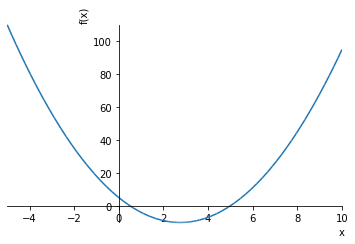

In [6]:
sp.plot(f_x,(x,-5,10))

In [7]:
x1.subs([(a,ac),(b,bc),(c,cc)])

5

In [8]:
x2.subs(([(a,ac),(b,bc),(c,cc)]))

1/2

## Numerical methods

### Definition of function

### Implementation of bracketing method from book

### Run method on function

### Use high grade method from scipy

### Solving for other functions

## Real Problems

### Example of spherical tank (using Newton Raphson)

A spherical tank of radius $5ft$ is constructed and the level of water in it, or height $h$ needs to be measured when the tank reaches $20ft^3$ of volume. The equation for the volume of liquid is as follows:

$$V = \pi h^2 \frac{[3r-h]}{3}$$

where $V$ is volume, $h$ is level height of fluid, and $r$ is the radius of the tank.

Lets use the Newton Raphson open method to solve.

$$x_{i+1}=x_i-\frac{f(x_i)}{f'(x_i)}$$

NR Error calculation

$$E_a=\left| \frac{(x_{i+1}-x_i)}{x_{i+1}} \right| \times100$$

### Code

### Plotting

### Loop

### Comparison with bisection method from earlier

### 1 - Vogel's inflow performance relationship
Vogel was the first to present an easy-to-use method for predicting the performance of oil wells. His empirical inflow performance relationship (IPR) is based on computer simulation results and is given by

$$\frac{q_o}{q_{o,max}}=1-0.2\left(\frac{p_{wf}}{\bar p_R}\right)-0.8\left(\frac{p_{wf}}{\bar p_R}\right)^2$$

$q_o$ is the oil flow rate in _STB/D_

$q_{o,max}$ is the maximum oil flow rate in _STB/D_

$p_{wf}$ is bottomhole pressure in _psia_

$\bar p_R$ is average reservoir pressure in _psia_



### Application of Vogel's (using scipy methods)
A well is producing from a reservoir having an average reservoir pressure of 2,300 _psig_. A stabilized production test on the well resulted in a producing rate of 385 _STB/day_ when the flowing bottom hole pressure was 1,631 _psig_.

#### First find the maximum production rate $q_{o,max}$. 

In [10]:
p_wf,p_r = sp.symbols('p_wf p_r')
q_ratio = 1-0.2*(p_wf/p_r)-0.8*(p_wf/p_r)**2
q_ratio

1 - 0.2*p_wf/p_r - 0.8*p_wf**2/p_r**2

In [13]:
q_o = 385.
q_o_max = q_o/q_ratio.subs([(p_wf,1631),(p_r,2300)])
q_o_max

844.518386711755

In [14]:
q_o_max = 385./(1-0.2*(1631/2300)-0.8*(1631/2300)**2)
q_o_max

844.5183867117553

#### Now use root finding to find a specific producing bottom hole pressure
If we desire an inflow rate of 650 _STB/D_ what is the required bottom hole pressure.

In [15]:
expr = q_ratio-(650/q_o_max)
expr

0.23033055262318 - 0.2*p_wf/p_r - 0.8*p_wf**2/p_r**2

#### Plot

In [ ]:
sp.plot(expr,(p_wf,0,1000))

### Define function

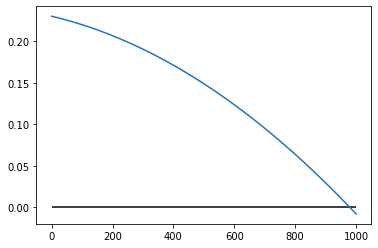

In [17]:
def f(x): return (1.-0.2*(x/2300.)-0.8*(x/2300)**2)-(650/844.5)
x = np.arange(0,1000,0.01)
plt.plot(x,f(x))
plt.hlines(0,0,1000)

### Solve

#### Bracketed Method (scipy.bisect)

In [21]:
from scipy.optimize import bisect
x = bisect(f,800,1000,xtol=1e-6)
x
import scipy
x = scipy.optimize.bisect(f,800,1000,xtol=1e-6)
x

979.625179618597

#### Open method (scipy.optimize.fsolve)

In [23]:
x = scipy.optimize.fsolve(f,800.)
x

array([979.62517945])

### 2 - Pipe Friction (using scipy methods)

The Colebrook equation is a very common way to calculate friction factor (a dimensionless number that characterizes the pipe's resistance to flow) for pipe flow when the flow is turbulent i.e. $Re>4000$.

$$0 = \frac{1}{\sqrt{f}}+2.0log\left (\frac{\epsilon}{3.7D}+\frac{2.51}{Re\sqrt{f}} \right) $$

where $\epsilon$ = the roughness in _m_, $D$ = diameter in _m_, and $Re$ = the _Reynolds number_

$$Re=\frac{\rho V D}{\mu}$$

where $\rho$ = the fluid's density in $kg/m^3$, $V$ is the fluid velocity in _m/s_, and $\mu$ = dynamic viscosity in $N \cdot s/m^2$

#### Solve for the friction factor for a specific pipe flow 

Assume for the case of $\rho=1.23kg/m^3$, $\mu=1.79\times10^{-5}N\cdot s/m^2$, $D=0.005m$, $V=40m/s$, and $\epsilon=0.0015mm$.

#### First calculate Reynolds Number

In [25]:
p = 1.23
u = 1.79e-5
d = 0.005
v = 40
e = 0.0015e-3

Re = (p*v*d)/(u)
Re

13743.016759776536

### Define function

In [26]:
def f(x): return 1./np.sqrt(x)+2.*np.log10(e/(3.7*d)+(2.51/(Re*np.sqrt(x))))

### Plot to see where root value may lie

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


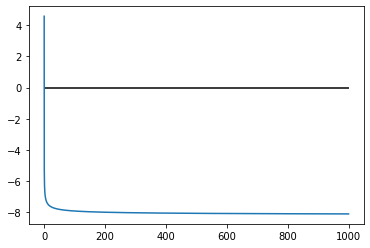

In [27]:
x = np.arange(0,1000,0.01)
plt.plot(x,f(x))
plt.hlines(0,0,1000)

#### Bracketed Method

In [29]:
from scipy.optimize import bisect
x = bisect(f,0,1000,xtol=1e-6)
x

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


0.02896692603826523

#### Open method

In [30]:
x = scipy.optimize.fsolve(f,.01)
x

array([0.02896781])